# Comparing the behavior of different stocks


Everyone with a modicum of coding aptitude has tried to create a stock bot at one point in time, so I am compelled to hop on the bandwagon. Easily the most difficult part of creating an automated trading bot is finding the winning strategy. Which indications will you use to signal it's time to buy? How about sell? Which tickers should we even trade? This is a pretty massive question that if I could answer I would already be a quant trader! So in this short notebook I'll just aim to do one piece of analysis that could help on the quest to infinite $$.  

Let's start by looking at some historical data for 34 tickers. I chose large cap stocks and downloaded some historical data from this website: https://firstratedata.com/. The files associted with each ticker are in the same directory as this script. Below we'll read these files and store the data in pandas dataframes-- one for each ticker.

In [1]:
import pandas

AAL_df = pandas.read_csv('AAL_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
AAPL_df = pandas.read_csv('AAPL_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
ADBE_df = pandas.read_csv('ADBE_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
AABV_df = pandas.read_csv('ABBV_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
AMZN_df = pandas.read_csv('AMZN_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
AXP_df = pandas.read_csv('AXP_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
GCI_df = pandas.read_csv('GCI_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
GE_df = pandas.read_csv('GE_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
GOOG_df = pandas.read_csv('GOOG_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
HAL_df = pandas.read_csv('HAL_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
HAS_df = pandas.read_csv('HAS_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
HSY_df = pandas.read_csv('HSY_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
IBM_df = pandas.read_csv('IBM_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
MA_df = pandas.read_csv('MA_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
MRK_df = pandas.read_csv('MRK_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
NCLH_df = pandas.read_csv('NCLH_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
NFLX_df = pandas.read_csv('NFLX_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
NKE_df = pandas.read_csv('NKE_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
NRG_df = pandas.read_csv('NRG_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
ODP_df = pandas.read_csv('ODP_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
ORCL_df = pandas.read_csv('ORCL_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
PCG_df = pandas.read_csv('PCG_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
SHW_df = pandas.read_csv('SHW_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
SPG_df = pandas.read_csv('SPG_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
SPY_df = pandas.read_csv('SPY_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
SWK_df = pandas.read_csv('SWK_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
TAP_df = pandas.read_csv('TAP_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
TGT_df = pandas.read_csv('TGT_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
TRIP_df = pandas.read_csv('TRIP_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
TWTR_df = pandas.read_csv('TWTR_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
UAL_df = pandas.read_csv('UAL_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
UNH_df = pandas.read_csv('UNH_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
UPS_df = pandas.read_csv('UPS_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")
V_df = pandas.read_csv('V_5min_sample.txt', names=["Date", "Open", "High", "Low", "Close","Volume"], index_col="Date")

# put all the dataframes into a list so we can loop through them later
DF_list = [AAL_df, AAPL_df, AABV_df, ADBE_df, AMZN_df, AXP_df,GCI_df, GE_df, GOOG_df, HAL_df, HAS_df, HSY_df,IBM_df, MA_df,MRK_df,NCLH_df,NFLX_df,NKE_df,NRG_df,ODP_df,ORCL_df,PCG_df,SHW_df,SPG_df,SPY_df,SWK_df,TAP_df,TGT_df,TRIP_df,TWTR_df,UAL_df,UNH_df,UPS_df,V_df]
ticker_names = ['AAL', 'AAPL', 'AABV', 'ADBE', 'AMZN', 'AXP', 'GCI', 'GE', 'GOOG', 'HAL', 'HAS', 'HSY', 'IBM', 'MA', 'MRK', 'NCLH', 'NFLX', 'NKE','NRG', 'ODP', 'ORCL', 'PCG','SHW','SPG','SPY','SWK','TAP','TGT','TRIP','TWTR','UAL','UNH','UPS','V']

Let's do a quick sanity check and make sure the data for each ticker look good!

In [2]:
for stock_df in DF_list:
    display(stock_df.head())
print('The data look good to me!')

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 04:00:00,18.29,18.29,18.29,18.29,225
2022-04-01 04:10:00,18.39,18.40,18.39,18.39,1902
2022-04-01 04:15:00,18.37,18.37,18.37,18.37,1088
2022-04-01 04:20:00,18.37,18.37,18.30,18.30,721
2022-04-01 04:50:00,18.33,18.33,18.32,18.32,1354


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 04:00:00,175.25,175.88,175.10,175.45,7677
2022-04-01 04:05:00,175.45,175.45,175.37,175.37,3387
2022-04-01 04:10:00,175.44,175.44,175.30,175.30,2414
2022-04-01 04:15:00,175.23,175.30,175.17,175.19,1964
2022-04-01 04:20:00,175.22,175.42,175.22,175.42,1428


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 08:00:00,161.6501,161.6501,161.6501,161.6501,100
2022-04-01 09:00:00,161.1305,161.1305,161.1305,161.1305,259
2022-04-01 09:15:00,161.1305,161.1305,161.1305,161.1305,362
2022-04-01 09:25:00,160.8628,160.8628,160.8628,160.8628,200
2022-04-01 09:30:00,160.7835,160.9322,158.7508,159.2218,239957


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 05:00:00,459.20,459.20,459.20,459.20,200
2022-04-01 05:45:00,460.00,460.00,460.00,460.00,100
2022-04-01 08:30:00,459.00,459.00,459.00,459.00,100
2022-04-01 08:40:00,459.99,459.99,459.99,459.99,100
2022-04-01 09:00:00,457.35,457.35,457.35,457.35,100


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 07:05:00,3281.00,3281.00,3281.00,3281.00,100
2022-04-01 07:10:00,3279.11,3279.11,3279.01,3279.01,300
2022-04-01 07:15:00,3279.00,3279.00,3279.00,3279.00,100
2022-04-01 07:20:00,3280.01,3280.01,3280.01,3280.01,100
2022-04-01 07:45:00,3281.00,3281.00,3281.00,3281.00,100


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 08:10:00,188.4650,188.4650,188.4650,188.4650,100
2022-04-01 09:10:00,186.5405,186.5405,186.5405,186.5405,100
2022-04-01 09:25:00,187.6673,187.6673,187.6673,187.6673,132
2022-04-01 09:30:00,187.6673,188.1958,187.6673,187.9465,510
2022-04-01 09:35:00,188.3753,188.4451,188.1659,188.2955,3091


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 09:30:00,4.540,4.56,4.52,4.550,17294
2022-04-01 09:35:00,4.535,4.54,4.53,4.540,5585
2022-04-01 09:40:00,4.540,4.54,4.52,4.520,4500
2022-04-01 09:45:00,4.510,4.51,4.48,4.490,30687
2022-04-01 09:50:00,4.490,4.49,4.47,4.475,6420


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 05:45:00,91.2400,91.26,91.1500,91.26,452
2022-04-01 07:30:00,91.8100,91.81,91.8000,91.80,318
2022-04-01 07:40:00,91.5400,91.54,91.5400,91.54,100
2022-04-01 08:00:00,92.1100,92.11,92.1100,92.11,1000
2022-04-01 08:05:00,92.1099,92.11,92.1099,92.11,2200


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 08:40:00,2806.00,2806.00,2806.00,2806.00,372
2022-04-01 08:45:00,2806.00,2806.00,2806.00,2806.00,1050
2022-04-01 08:50:00,2803.16,2803.16,2803.16,2803.16,100
2022-04-01 09:05:00,2792.99,2792.99,2792.99,2792.99,358
2022-04-01 09:25:00,2802.95,2802.95,2802.95,2802.95,100


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 07:20:00,38.0100,38.0100,38.00,38.00,700
2022-04-01 08:00:00,38.0099,38.0099,38.00,38.00,277
2022-04-01 08:35:00,37.9500,37.9500,37.90,37.90,200
2022-04-01 08:45:00,37.9000,37.9500,37.90,37.95,1063
2022-04-01 08:50:00,37.9500,37.9500,37.95,37.95,100


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 09:25:00,82.450,82.4500,82.42,82.4200,546
2022-04-01 09:30:00,82.340,83.4000,82.34,83.1800,23370
2022-04-01 09:35:00,83.175,83.2900,82.79,82.7900,6173
2022-04-01 09:40:00,82.830,82.8300,82.33,82.4285,4893
2022-04-01 09:45:00,82.350,82.5658,82.34,82.4600,2257


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 09:30:00,216.830,216.830,216.06,216.100,12210
2022-04-01 09:35:00,216.500,217.235,216.50,216.875,2916
2022-04-01 09:40:00,216.920,217.650,216.81,217.650,3938
2022-04-01 09:45:00,217.545,218.300,217.45,218.220,3896
2022-04-01 09:50:00,218.260,218.500,217.96,217.970,2087


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 05:35:00,130.25,130.25,130.25,130.25,200
2022-04-01 07:40:00,130.50,130.50,130.50,130.50,862
2022-04-01 08:00:00,130.50,130.83,130.50,130.83,200
2022-04-01 08:35:00,130.02,130.02,130.02,130.02,1100
2022-04-01 09:10:00,130.55,130.55,130.55,130.55,169


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 05:30:00,357.4040,357.4040,357.4040,357.4040,110
2022-04-01 08:25:00,356.8847,356.8847,356.8847,356.8847,215
2022-04-01 09:30:00,358.7221,361.5782,357.6736,360.9391,78979
2022-04-01 09:35:00,361.1338,362.2771,360.4198,360.9990,30864
2022-04-01 09:40:00,361.2287,363.1160,360.4198,363.1160,19117


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 07:30:00,82.9000,82.9000,82.8000,82.8000,1354
2022-04-01 08:00:00,82.1000,82.9900,82.1000,82.9900,1830
2022-04-01 08:15:00,82.1000,82.1000,82.1000,82.1000,800
2022-04-01 08:20:00,82.4799,82.4799,82.4799,82.4799,300
2022-04-01 09:05:00,82.1500,82.1500,82.1500,82.1500,296


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 04:55:00,22.14,22.14,22.14,22.14,100
2022-04-01 05:00:00,22.15,22.15,22.15,22.15,492
2022-04-01 05:05:00,22.15,22.15,22.14,22.14,642
2022-04-01 05:20:00,22.12,22.12,22.12,22.12,100
2022-04-01 06:10:00,22.15,22.15,22.15,22.15,100


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 07:25:00,377.2500,377.2500,377.2500,377.2500,200
2022-04-01 07:50:00,377.2400,377.2400,377.2400,377.2400,660
2022-04-01 08:00:00,377.4414,377.8531,376.8700,377.0999,1900
2022-04-01 08:10:00,378.9544,378.9544,378.9544,378.9544,100
2022-04-01 08:15:00,378.5995,378.6000,378.5995,378.6000,1200


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 04:00:00,135.8900,135.8900,135.8900,135.8900,100
2022-04-01 04:30:00,135.9900,135.9900,135.9900,135.9900,100
2022-04-01 07:00:00,136.4500,136.4500,136.1000,136.1000,200
2022-04-01 08:15:00,135.9959,135.9966,135.9959,135.9966,550
2022-04-01 08:20:00,136.0000,136.0000,136.0000,136.0000,100


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 06:25:00,38.80,38.80,38.80,38.80,100
2022-04-01 09:30:00,38.56,38.66,38.40,38.42,32012
2022-04-01 09:35:00,38.42,38.53,38.42,38.50,6401
2022-04-01 09:40:00,38.50,38.53,38.47,38.50,5701
2022-04-01 09:45:00,38.53,38.60,38.52,38.57,3534


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 09:30:00,45.98,45.980,45.98,45.980,1371
2022-04-01 09:35:00,46.40,46.420,46.21,46.420,1189
2022-04-01 09:40:00,46.28,46.370,46.26,46.350,1200
2022-04-01 09:45:00,46.59,46.745,46.52,46.745,1100
2022-04-01 09:50:00,46.64,46.640,46.53,46.530,400


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 04:50:00,82.7662,82.7662,82.6766,82.6766,700
2022-04-01 08:00:00,82.3080,82.3080,82.3080,82.3080,300
2022-04-01 08:30:00,82.6467,82.6467,82.6467,82.6467,200
2022-04-01 09:05:00,82.6766,82.6766,82.6766,82.6766,100
2022-04-01 09:30:00,82.7164,83.0352,82.6367,82.7015,128575


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 07:05:00,11.92,11.96,11.86,11.860,13564
2022-04-01 09:05:00,11.99,11.99,11.99,11.990,469
2022-04-01 09:20:00,12.01,12.01,12.01,12.010,500
2022-04-01 09:25:00,12.00,12.00,12.00,12.000,410
2022-04-01 09:30:00,11.97,12.00,11.88,11.885,135526


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 09:30:00,251.360,252.35,249.92,250.9800,40000
2022-04-01 09:35:00,251.355,251.78,250.08,250.3350,5660
2022-04-01 09:40:00,250.440,250.56,249.64,249.9131,9427
2022-04-01 09:45:00,249.965,251.37,249.86,251.3700,4546
2022-04-01 09:50:00,251.210,251.77,251.09,251.7150,2789


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 04:00:00,131.5600,131.5600,131.56,131.56,100
2022-04-01 08:05:00,134.8800,134.8800,134.88,134.88,100
2022-04-01 08:15:00,133.0000,133.0000,133.00,133.00,140
2022-04-01 08:30:00,133.0000,133.0000,131.56,131.56,740
2022-04-01 09:00:00,132.3301,132.3301,132.33,132.33,200


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 04:00:00,453.68,453.95,453.55,453.91,5757
2022-04-01 04:05:00,453.93,453.96,453.80,453.88,6830
2022-04-01 04:10:00,453.95,453.99,453.81,453.81,541
2022-04-01 04:15:00,453.76,453.80,453.58,453.58,2900
2022-04-01 04:20:00,453.80,453.92,453.71,453.86,1116


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 08:55:00,140.00,140.00,140.00,140.00,100
2022-04-01 09:05:00,140.50,140.50,140.50,140.50,1785
2022-04-01 09:25:00,140.50,140.50,140.50,140.50,284
2022-04-01 09:30:00,140.92,141.72,140.53,140.82,20953
2022-04-01 09:35:00,141.04,141.13,140.33,140.33,10389


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 08:35:00,53.380,53.380,53.380,53.38,1288
2022-04-01 09:35:00,53.390,53.550,53.090,53.09,28828
2022-04-01 09:40:00,53.105,53.105,52.700,52.81,12800
2022-04-01 09:45:00,52.750,52.950,52.695,52.88,4773
2022-04-01 09:50:00,52.840,52.840,52.560,52.75,11477


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 08:00:00,213.65,213.98,213.65,213.98,370
2022-04-01 08:20:00,213.50,213.50,213.50,213.50,100
2022-04-01 08:25:00,212.22,212.22,212.22,212.22,113
2022-04-01 08:30:00,213.50,213.50,213.50,213.50,1251
2022-04-01 08:45:00,213.50,213.50,213.50,213.50,199


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 09:30:00,27.46,27.54,27.215,27.510,21664
2022-04-01 09:35:00,27.47,27.57,27.470,27.510,5213
2022-04-01 09:40:00,27.51,27.58,27.480,27.550,8493
2022-04-01 09:45:00,27.54,27.68,27.540,27.585,51339
2022-04-01 09:50:00,27.59,27.59,27.490,27.575,5649


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 04:55:00,38.58,38.58,38.58,38.58,132
2022-04-01 06:25:00,38.98,39.19,38.98,39.19,1807
2022-04-01 06:45:00,39.16,39.16,39.16,39.16,150
2022-04-01 07:00:00,39.00,39.00,39.00,39.00,1000
2022-04-01 07:05:00,39.01,39.01,39.01,39.01,150


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 04:15:00,46.80,46.80,46.80,46.80,500
2022-04-01 04:20:00,46.80,46.80,46.80,46.80,500
2022-04-01 05:30:00,46.76,46.76,46.76,46.76,279
2022-04-01 07:00:00,46.69,46.74,46.68,46.71,1570
2022-04-01 07:10:00,46.72,46.75,46.72,46.75,693


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 07:50:00,514.98,514.98,514.98,514.9800,100
2022-04-01 08:15:00,514.00,514.00,514.00,514.0000,100
2022-04-01 09:25:00,511.83,511.83,510.02,510.0200,300
2022-04-01 09:30:00,510.68,510.94,506.60,508.4055,67329
2022-04-01 09:35:00,508.56,511.41,507.64,510.8600,17489


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 08:50:00,215.1001,215.1001,215.1001,215.1001,106
2022-04-01 09:30:00,214.9000,215.1800,214.7600,214.9001,75370
2022-04-01 09:35:00,215.0200,215.2100,213.5000,213.7250,13195
2022-04-01 09:40:00,213.7900,213.8200,212.1500,212.1800,30528
2022-04-01 09:45:00,212.3100,212.5200,211.2300,211.7700,34567


,Open,High,Low,Close,Volume
Date,,,,,
2022-04-01 04:35:00,221.10,221.10,221.10,221.10,100
2022-04-01 06:40:00,223.15,223.15,223.15,223.15,118
2022-04-01 06:45:00,223.15,223.15,223.15,223.15,194
2022-04-01 07:05:00,223.10,223.10,223.10,223.10,200
2022-04-01 07:10:00,223.10,223.10,223.00,223.00,202


The data look good to me!


There are a lot of different strategies to try, but I'm going to start with one-- a crossover event between an exponential moving average and a simple moving average. When the exponential moving average crosses above the simple moving average it means that the stock is (likely) trending upward. The reverse is true when the exponential average crosses below the simple moving average. See the image below.
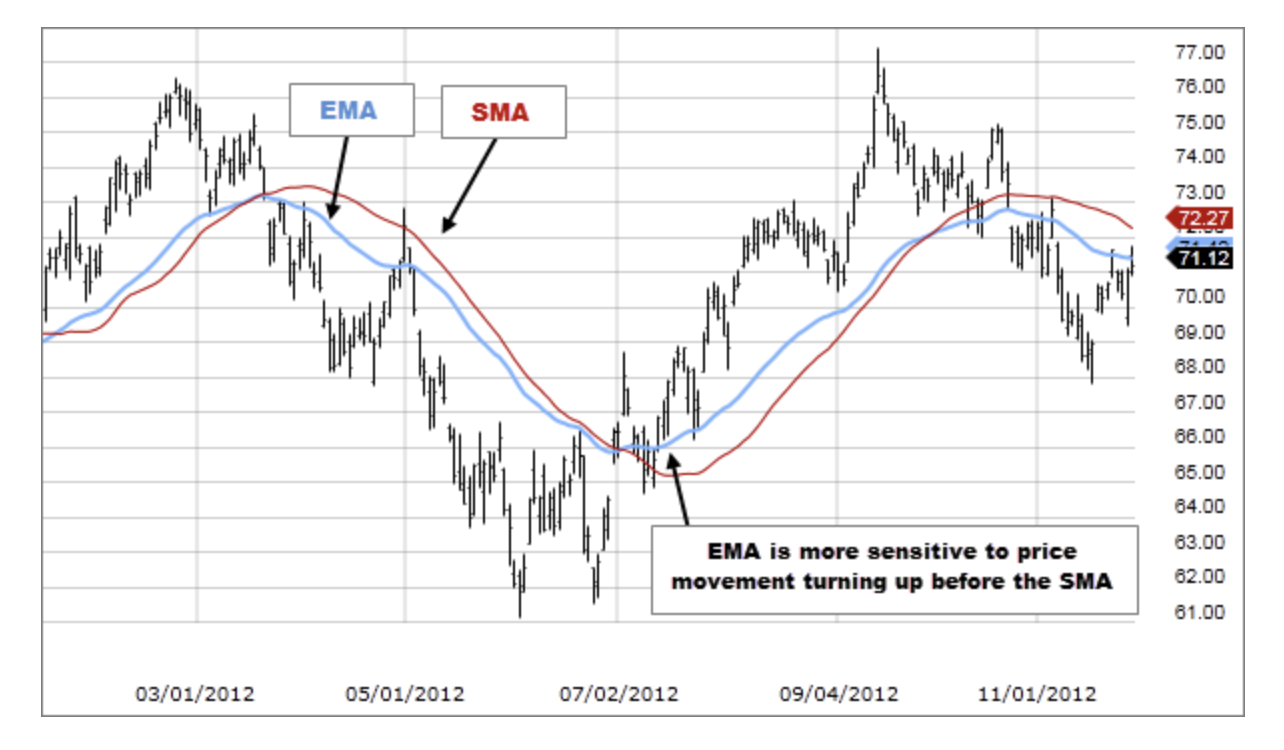

Below is a code-cell that takes an input of a dataframe for a ticker and simulates buys and sells over the time period specified by the indices of the dataframe. The output is a dictionary with some relevant statistics: the number of trades made, the average ROI per trade, the maximum gain from one trade, and the maximum loss from one trade. These can help us paint a 4-data point picture for each ticker's behavior over time under this simulation.

In [25]:
def calculate_ema(prices, days, smoothing=2):
    # unfortunately talib, python library for technical indicators is not letting me import it, so I can't use the built in EMA function
    # instead we have to use this helper function copied from here: https://plainenglish.io/blog/how-to-calculate-the-ema-of-a-stock-with-python
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema

def get_summary_stats(ticker):
    # add the simple moving average to the dataframe
    ticker['sma_8'] = ticker['Close'].rolling(8).mean()
    
    # add the exponential moving average to the dataframe
    ema = 7*[None]+calculate_ema(ticker['Close'], 8)
    ticker['ema_8'] = ema
    
    # add colummn for the difference between the two
    ticker['difference_in_moving_avgs'] = ticker['ema_8']-ticker['sma_8']
    
    buy_prices = [] # initialized list of prices we buy stocks at
    sell_prices = []  # initialized list of prices we sell stocks at
    in_position = False # we start not being in any trades
    
    # loop through each time point and simulate buys and sells
    for i in range(len(ticker)-1):
        # check to see if it's the end of day. We don't want to hold stocks overnight because of volatility
        if str(ticker.index[i]).split(' ')[0] != str(ticker.index[i+1]).split(' ')[0]:
            end_of_day = True
        else:
            end_of_day = False

        if not in_position:
            if ticker['difference_in_moving_avgs'].iloc[i] > 0: # ema is higher than sma
                buy_prices.append(ticker['Close'].iloc[i])    # add this price to our list of buy prices 
                in_position = True
        else: 
            if ticker['difference_in_moving_avgs'].iloc[i] < 0 or end_of_day: 
                sell_prices.append(ticker['Close'].iloc[i]) 
                in_position = False
    global profit_ratio_per_trade
    profit_ratio_per_trade = [i/j for i,j in zip(sell_prices,buy_prices)]
    
    # calculate the stats relevant to the simulation
    if len(profit_ratio_per_trade) > 0 :
        avg_ROI = ((sum(profit_ratio_per_trade)/len(profit_ratio_per_trade))-1)*100
        max_ROI = 100*(max(profit_ratio_per_trade)-1)
        min_ROI = 100*(min(profit_ratio_per_trade)-1)
        num_trades = len(profit_ratio_per_trade)
    else:
        avg_ROI = 0
        max_ROI = 0
        min_ROI = 0
        num_trades = 0
        
    return (avg_ROI, max_ROI, min_ROI, num_trades)

In [30]:
stats_df = pandas.DataFrame()
stats_df['Stats'] = ['avg_ROI', 'max_ROI', 'min_ROI', 'num_trades']

for i in range(len(DF_list)):
    avg_ROI, max_ROI, min_ROI, num_trades = get_summary_stats(DF_list[i])
    stats_df[ticker_names[i]] = [avg_ROI, max_ROI, min_ROI, num_trades]
    
print('Here are the data for the tickers:')
display(stats_df)

Here are the data for the tickers:


,Stats,AAL,AAPL,AABV,ADBE,AMZN,AXP,GCI,GE,GOOG,...,SPY,SWK,TAP,TGT,TRIP,TWTR,UAL,UNH,UPS,V
0,avg_ROI,0.076873,-0.019371,-0.015372,-0.092174,-0.008056,-0.068440,-0.046144,0.021047,-0.097345,...,-0.012330,0.070076,0.026372,0.015508,-0.157859,0.201684,0.009891,0.017786,-0.028661,-0.045918
1,max_ROI,4.573513,2.002525,2.539559,1.511237,2.148465,1.530084,4.475138,1.613245,0.902607,...,0.573748,1.633779,3.432894,1.999540,1.747212,12.568426,3.906250,1.631815,1.905729,1.178921
2,min_ROI,-1.459251,-0.792105,-1.549961,-1.254639,-0.973503,-1.938889,-5.555556,-1.496824,-1.004381,...,-0.514070,-1.240712,-1.247184,-1.198145,-2.196575,-2.031413,-1.407212,-0.847744,-1.344578,-0.956686
3,num_trades,143.000000,152.000000,83.000000,78.000000,90.000000,75.000000,66.000000,74.000000,75.000000,...,155.000000,60.000000,66.000000,84.000000,72.000000,141.000000,114.000000,74.000000,75.000000,75.000000


Let us plot this!

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

Text(0.5, 0.98, 'EMA x SMA simulation results')

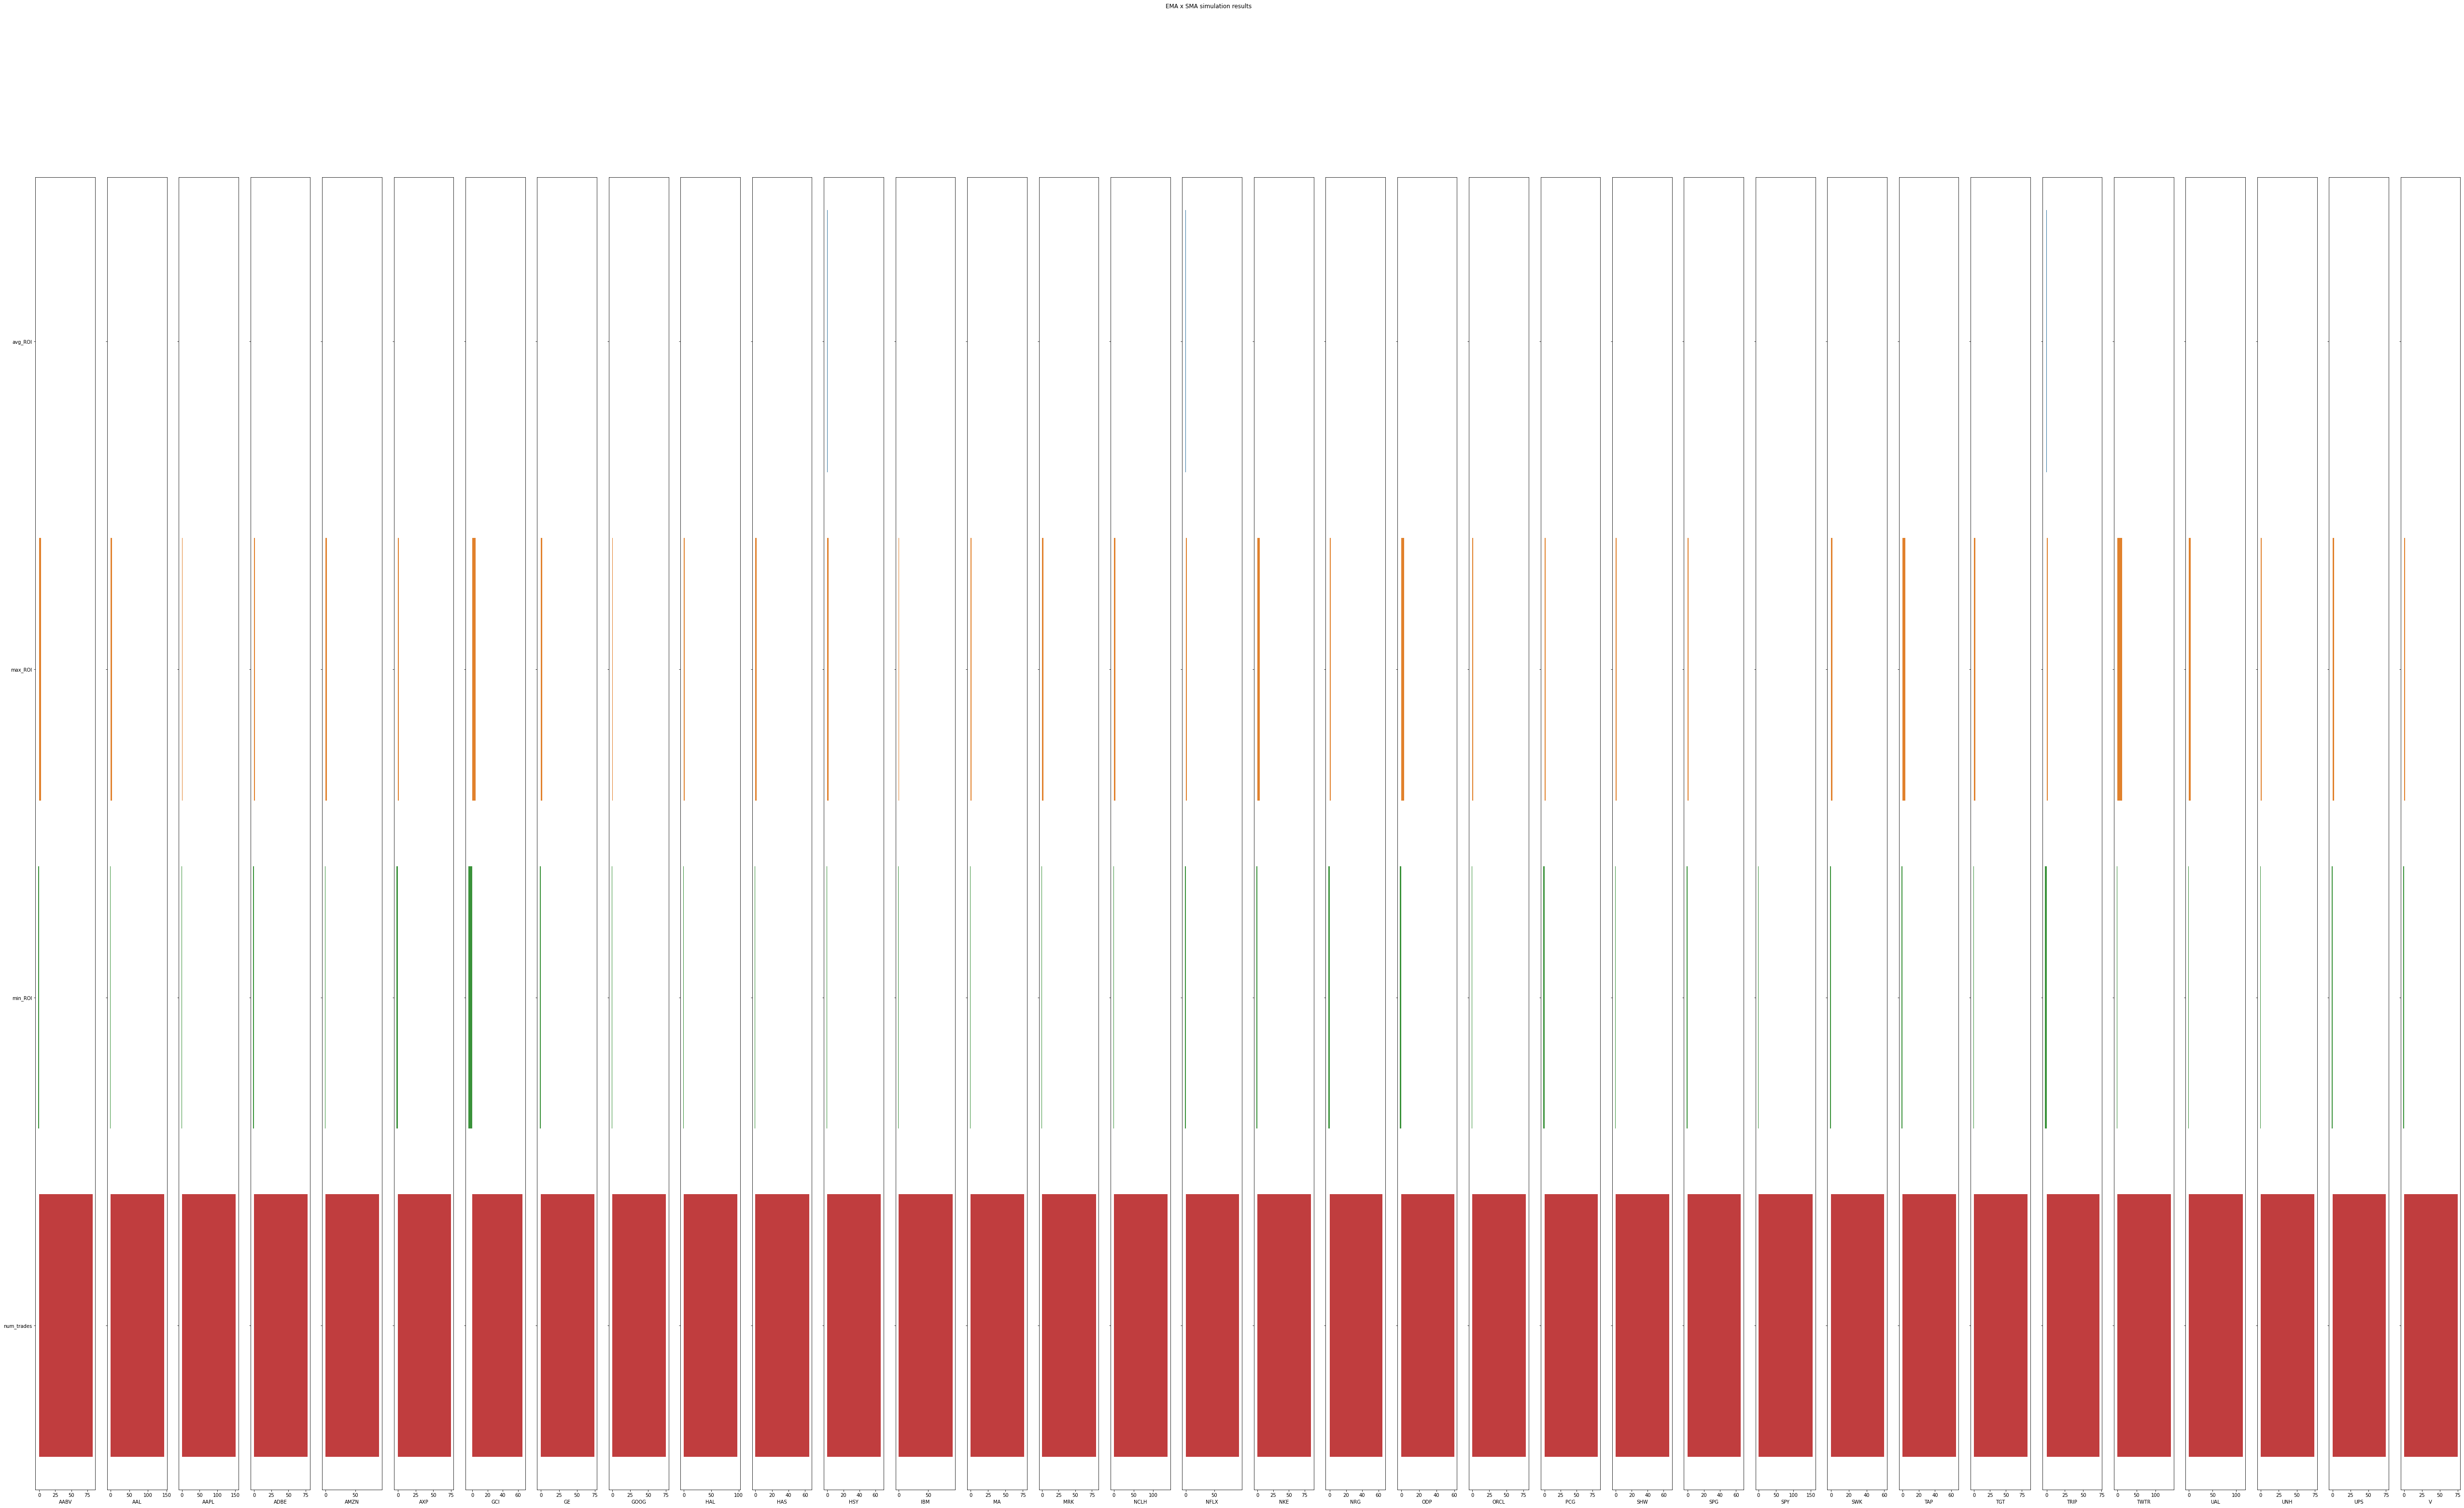

In [38]:
# make a bar chart for each ticker

fig, axes = plt.subplots(1, len(DF_list), figsize=(90, 50), sharey=True)
tickers = stats_df.columns.difference(['Stats'])
for i in range(len(tickers)):
    sns.barplot(x=tickers[i], y='Stats', data=stats_df, ax=axes[i])
    axes[i].set_ylabel("")
fig.suptitle("EMA x SMA simulation results")

# PCA time

Now that we have all of this data let's try to reduce the dimensionality so that we can glean some insights about which stocks behave similarly under this regime. So, to do this we can hark back to our lesson on principal component analysis.

In [43]:
import numpy as np
data = stats_df['Stats']
X_raw = stats_df[ticker_names].values.T
s = min(X_raw.shape)
X = X_raw - np.mean(X_raw, axis=0)

In [47]:
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)
m, d = X.shape

* AAL: (-55.77772975712798, -0.6056189765697856)
* AAPL: (-64.69727378379301, 2.3102057042318838)
* AABV: (4.256297736293074, -0.3805644429820407)
* ADBE: (9.284230600916368, 0.5444115180932502)
* AMZN: (-2.7308259616077013, 0.33456210274102605)
* AXP: (12.285169736046342, 0.28155722737518657)
* GCI: (21.206072418290464, -3.67514314834828)
* GE: (13.280172540123612, 0.2718062694866933)
* GOOG: (12.300397555224848, 1.1073141256159749)
* HAL: (-10.69548656136616, 1.5012535592614062)
* HAS: (22.283196898848225, 0.5792437910472582)
* HSY: (20.27450927434743, 0.19789354450484783)
* IBM: (-3.688585529908796, 1.7851963512881406)
* MA: (10.28600855020882, 0.6271928066576012)
* MRK: (6.265544863088619, 0.21993143160092476)
* NCLH: (-49.74090901534228, 0.3771105573318812)
* NFLX: (-6.720537137764918, 0.5866157989993706)
* NKE: (2.228295439805261, -1.1246345012028116)
* NRG: (22.296989690931035, 0.5606889099704194)
* ODP: (27.21896132736883, -1.9067496962602744)
* ORCL: (8.290526759723535, 0.7800

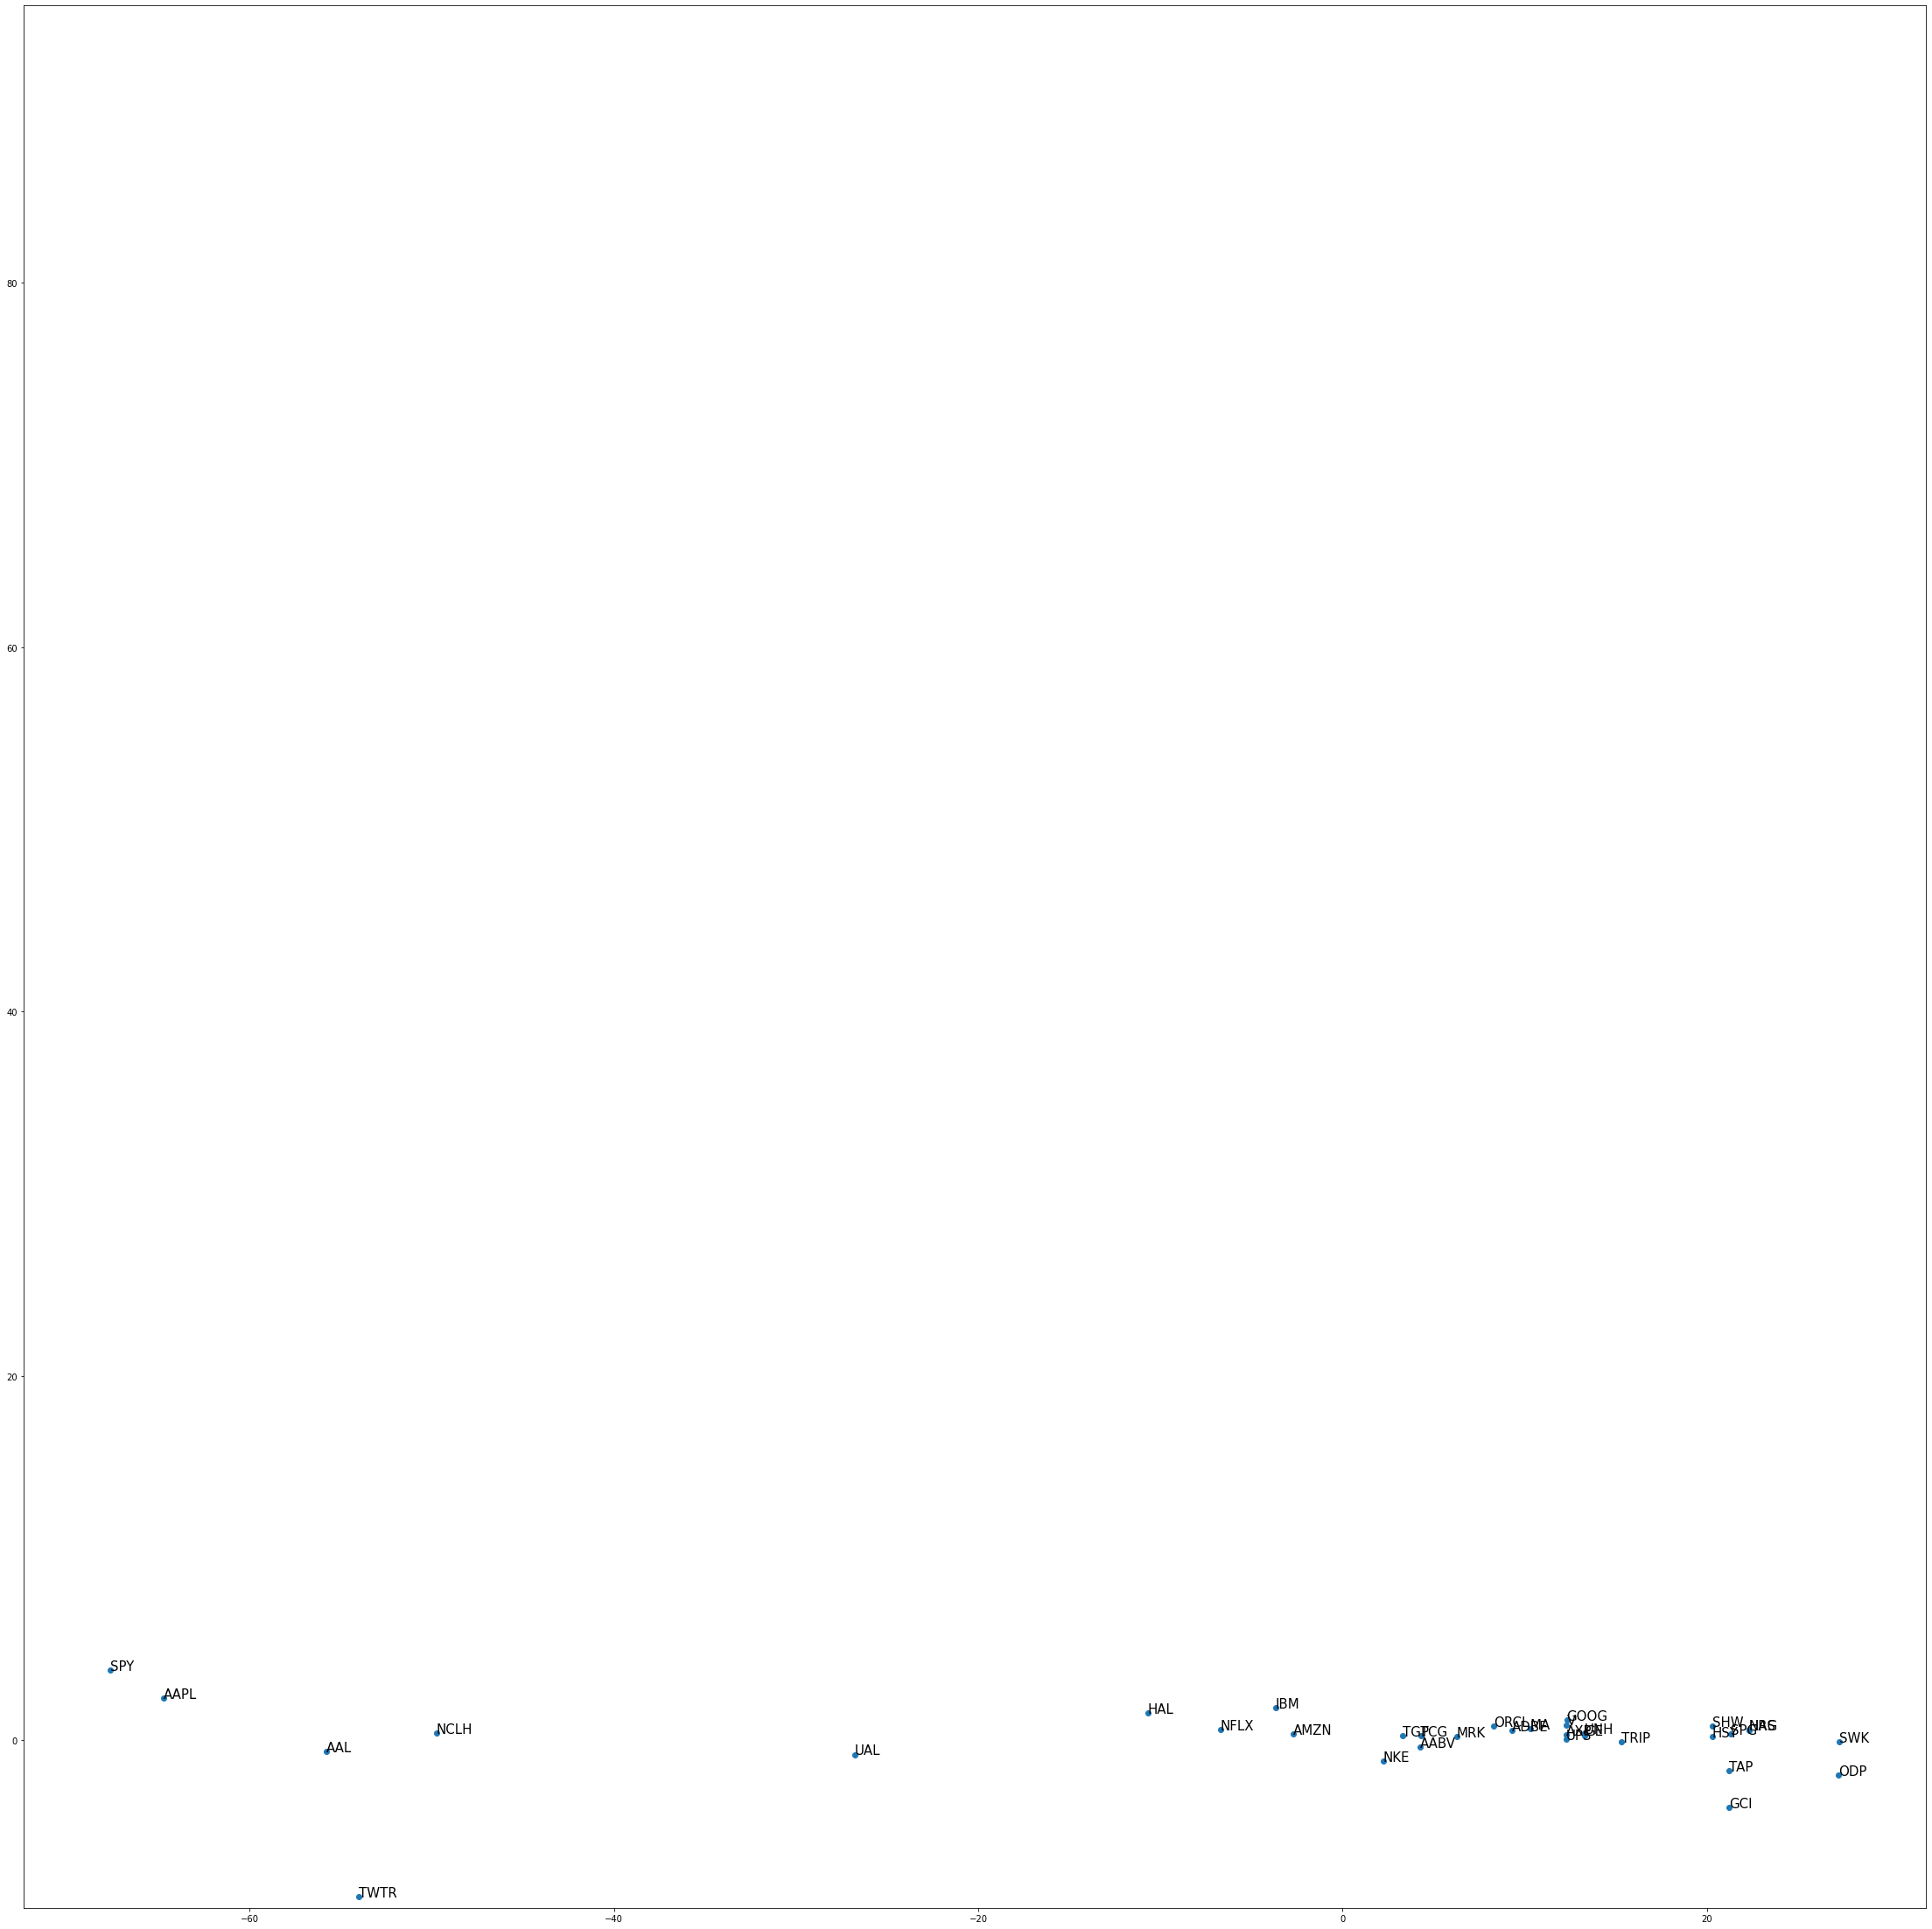

In [57]:
# Project into 2-D
Y_k = X.dot(VT[0:2, :].T)

# Print
for x, y, label in zip(Y_k[:, 0], Y_k[:, 1], ticker_names):
    print(f'* {label}: ({x}, {y})')

# Plot
fig = plt.figure(figsize=(40, 40))
plt.scatter(Y_k[:, 0], Y_k[:, 1])
for x, y, label in zip(Y_k[:, 0], Y_k[:, 1], ticker_names):
    plt.annotate(label, xy=(x, y), fontsize=15)
ax = plt.gca()
ax.axis('square');

From the data we see some expected similarities. Netflix (NFLX), IBM (IBM), and AMZN are all big tech companies, so it makes sense that they're clustered together. ABBV and MRK, two drug discovery giants are also pretty close to each other in 2D space, which is expected. Oracle (ORCL), Google (GOOG), and Adobe (ADBE) are all computer technology companies that lie close to each other. American Airlines (AAL) and Norwegein Cruises (NCHL) are both in the travel industry and are pretty close to each other, while United Airlines (UAL) is pretty far away. Twitter and United Airlines are both pretty far away from their nearest neighbors. So what does all this mean practically? It means that if you use the EMA x SMA strategy across all of these tickers the results are going to be not too similar in terms of average ROI, maximum ROI, minimum ROI, and the number of trades. If I had my stock bot streaming data for a bunch of tickers I would probably only monitor the stocks that are close together.

GOOG, AXP, and UPS are all close together, but looking back at the data we see that the average ROIs were negative, so that would be a bad choice for this strategy.

In [64]:
stats_df[['Stats','GOOG', 'AXP', 'UPS']]

,Stats,GOOG,AXP,UPS
0,avg_ROI,-0.097345,-0.068440,-0.028661
1,max_ROI,0.902607,1.530084,1.905729
2,min_ROI,-1.004381,-1.938889,-1.344578
3,num_trades,75.000000,75.000000,75.000000


In [66]:
# ORCL, ADBE, and MA would be a bad choice too 
stats_df[['Stats','ORCL','ADBE', 'MA']]

,Stats,ORCL,ADBE,MA
0,avg_ROI,-0.055029,-0.092174,-0.011196
1,max_ROI,1.312640,1.511237,1.420921
2,min_ROI,-1.192649,-1.254639,-1.144492
3,num_trades,79.000000,78.000000,77.000000


In [68]:
# not good either
stats_df[['Stats','SHW','HSY', 'SPG', 'NRG']]

,Stats,SHW,HSY,SPG,NRG
0,avg_ROI,-0.019685,0.067425,-0.004588,-0.007101
1,max_ROI,0.974789,1.609793,1.330918,0.971619
2,min_ROI,-1.089835,-0.949541,-1.288390,-1.825397
3,num_trades,67.000000,67.000000,66.000000,65.000000


In [71]:
# not quite there
stats_df[['Stats','AABV','MRK', 'TGT', 'PCG']]

,Stats,AABV,MRK,TGT,PCG
0,avg_ROI,-0.015372,0.040974,0.015508,-0.070073
1,max_ROI,2.539559,2.077347,1.999540,1.766467
2,min_ROI,-1.549961,-0.637862,-1.198145,-2.011263
3,num_trades,83.000000,81.000000,84.000000,83.000000


Unfortunately, no cluster is particularly profitable under this trading strategy, but this process could be repeated with different trading strategies until identifying which strategy works for a group of stocks.